<a href="https://colab.research.google.com/github/tonytung3721/py/blob/master/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [ ]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [ ]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# **Task 1: "Median value of owner-occupied homes" provide a boxplot**

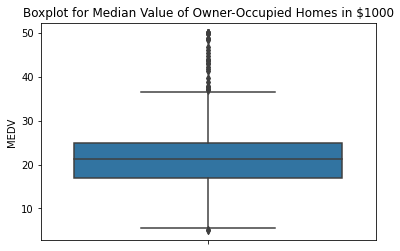

In [ ]:
ax = sns.boxplot(y='MEDV', data=boston_df).set(title='Boxplot for Median Value of Owner-Occupied Homes in $1000')

**Observation:** Meadian is around 22-24, there are some outliers in right whister.

# **Task 2: Provide a   histogram for the Charles river variable**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

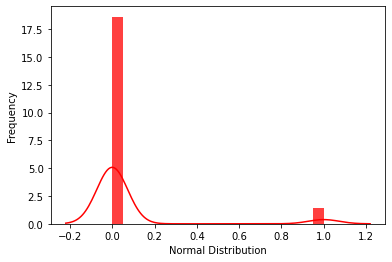

In [ ]:
ax = sns.distplot(boston_df['CHAS'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 10,'alpha':0.75})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

**Observation:** Almost observation houses located near by Charles river 

# **Task 3: Provide a boxplot for the MEDV variable vs the AGE variable**

In [ ]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

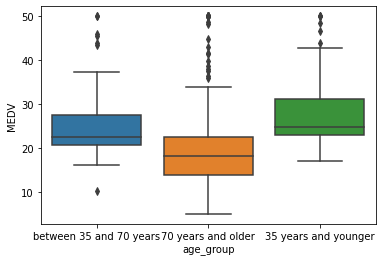

In [ ]:
ax = sns.boxplot(y='MEDV', data=boston_df, x = 'age_group')

**Observation:** The box shows that median MEDV for younger houses are higher compared to older houses.



# **Task 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town**

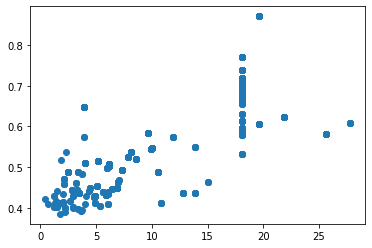

In [ ]:
plt.scatter(boston_df['INDUS'], boston_df['NOX'])

**There is correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town**

# **Task 5: Create a histogram for the pupil to teacher ratio variable**

Text(0.5, 1.0, 'Historgram of Pupil to Teacher Ratio')

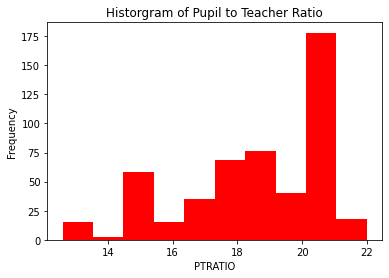

In [ ]:
plt.hist(boston_df['PTRATIO'], color='red')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.title('Historgram of Pupil to Teacher Ratio')

# **Part 2**

**Question 1:** Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)



In [ ]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [ ]:
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center='median')


LeveneResult(statistic=483.51250993800966, pvalue=7.087575216458403e-88)

p-value < 0.05 -> ***we can assume inequality of variance***

In [ ]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'], equal_var = False)

Ttest_indResult(statistic=54.9210289745203, pvalue=2.752650575837329e-215)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a significant difference in median value of houses bounded by the Charles river

**Question 2:** Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**State the hypothesis**

𝐻_0:µ_1=µ_2=µ_3  (the three population means are equal)

𝐻_1:  At least one of the means differ

In [ ]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='median')
# since the p-value is less than 0.05, the variances are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)

In [ ]:
lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
range = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
higher = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(lower, range, higher)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

**Question 3:** Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

***State the hypothesis:***

𝐻_0:  Nitric oxide concentrations  is not correlated with proportion of non-retail business acres per town

𝐻_1:  Nitric oxide concentrations  is correlated with proportion of non-retail 

Since they are both continuous variables we can use a **pearson** correlation test and draw a scatter plot

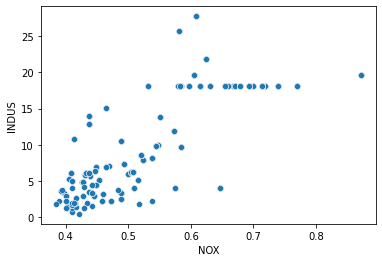

In [ ]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [ ]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

(0.7636514469209154, 7.913361061236894e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  Nitric oxide concentrations and proportion of non-retail business acres per town.

**Question 5:** What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mdl = sm.OLS(boston_df['MEDV'], sm.add_constant(boston_df['DIS'])).fit()
y_hat = mdl.predict(sm.add_constant(boston_df['DIS']))
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           1.21e-08
Time:                        16:30:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""